# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [204]:
! pwd

/Users/michaelmainzer/Documents/GA/DSI/mike1/01-projects/notebooks


In [205]:
import pandas as pd
import numpy as np

from datetime import datetime

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from IPython.display import Image

#'/Users/michaelmainzer/Documents/GA/DSI/mike1/01-projects/assets/02-project2-assets/billboard.csv'
bData = pd.read_csv('../assets/02-project2-assets/billboard.csv')

In [206]:
bData['date.entered'] = pd.to_datetime(bData['date.entered'])
bData['date.peaked'] = pd.to_datetime(bData['date.peaked'])
bData['x1st.week'] = bData['x1st.week'].astype(float)

In [207]:
bData['days.to.peak'] = (bData['date.peaked'] - bData['date.entered']).dt.days

In [208]:
totalWeeks = []

for i in range(len(bData)):
    totalWeeks.append(0)
    for j in range(7,83):
        if bData.iloc[i,j] >= 1:
            totalWeeks[i] += 1

bData['total.weeks'] = totalWeeks

### Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [209]:
df = pd.melt(bData, id_vars = ['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked', 
                               'days.to.peak', 'total.weeks'], var_name='Week', value_name='Rank')

df.columns = ['Year','Artist','Track','Length','Genre','Date Entered Rankings','Date Peaked','Days to Peak',
              'Total Weeks','Week','Rank']
df1 = df.dropna()

In [210]:
df1.Week = df1['Week'].apply(lambda x: x.lstrip('x').rstrip('rdndthst.week'))

In [211]:
#Data dictionary goes here.
df1.Week = df1['Week'].apply(lambda x: int(x))
df1.to_csv('../assets/02-project2-assets/billboard1.csv')

In [212]:
dfTracks = df1.groupby(df1['Track']).size()
dfTracks.to_csv('../assets/02-project2-assets/track_staying power.csv')

In [213]:
genreRank = df1['Rank'].groupby([df1['Genre']]).mean()
genreRank.to_csv('../assets/02-project2-assets/genre_mean.csv')

In [214]:
genreWeeks = df1['Total Weeks'].groupby([df1['Genre']]).mean()
genreWeeks.to_csv('../assets/02-project2-assets/genre_weeks.csv')

In [215]:
genreDaystoPeak = df1['Days to Peak'].groupby([df1['Genre']]).mean()
genreDaystoPeak.to_csv('../assets/02-project2-assets/genre_daystopeak.csv')

In [216]:
topTenOverTime = df1.loc[df1['Rank'] <= 10]

topTenOverTime.to_csv('../assets/02-project2-assets/top_ten_over_time.csv')

In [217]:
topFiveOverTime = df1.loc[df1['Rank'] <= 5]

topFiveOverTime.to_csv('../assets/02-project2-assets/top_five_over_time.csv')

In [218]:
newdf = df1.loc[df1['Rank'] < 2]
del newdf['Week']
topHits = newdf.drop_duplicates()
topHits.to_csv('../assets/02-project2-assets/topHits.csv')

In [219]:
del topTenOverTime['Week']
del topTenOverTime['Rank']
topTen = topTenOverTime.drop_duplicates()

Variable | Description | Variable Type
--|--|--
Year | The year the song was released | Integer
Artist | The song's artist | Object
Track | The song's title | Object
Length | The song's length, in minutes and seconds | Object
Genre | The song's genre | Object
Date Entered Rankings | Year, month, and day the song entered the Billboard Top 100 | Datetime
Date Peaked | Date the song reached it's highest rank while in the Billboard Top 100 | Datetime
Days to Peak | Amount of days it took for the song to reach that peack | Integer
Total Weeks | Number of weeks the song remained in the Billboard Top 100 | Integer
Week | Lists each week of the rankings from 1 - 64 | Integer
Rank | Provides correspronding rank of each song at that particular week | Float

## Step 3: Visualize your data.

The visual below tells us a few things about the data. First, each bubble represents a single song, and all songs are arranged by their genre, indicated by the color assigned in the legend. Finally, the staying power of each song is noted by the size of the bubble - the larger the bubble, the longer the song remained in the Top 100.

Clearly, we can see that Rock is the most popular within the entire data set. Not only does it contain the most songs, it also contains the most songs that remained in the charts for many weeks.

Another interesting thing to note is the grouping of country songs. While there were quite a few country songs represented at some point, only one, 'Amazed' seemed to have any lasting popularity. In the future, a record company involved in producing country songs may seek to emulate trends within 'Amazed' in an attempt to replicate its popularity.

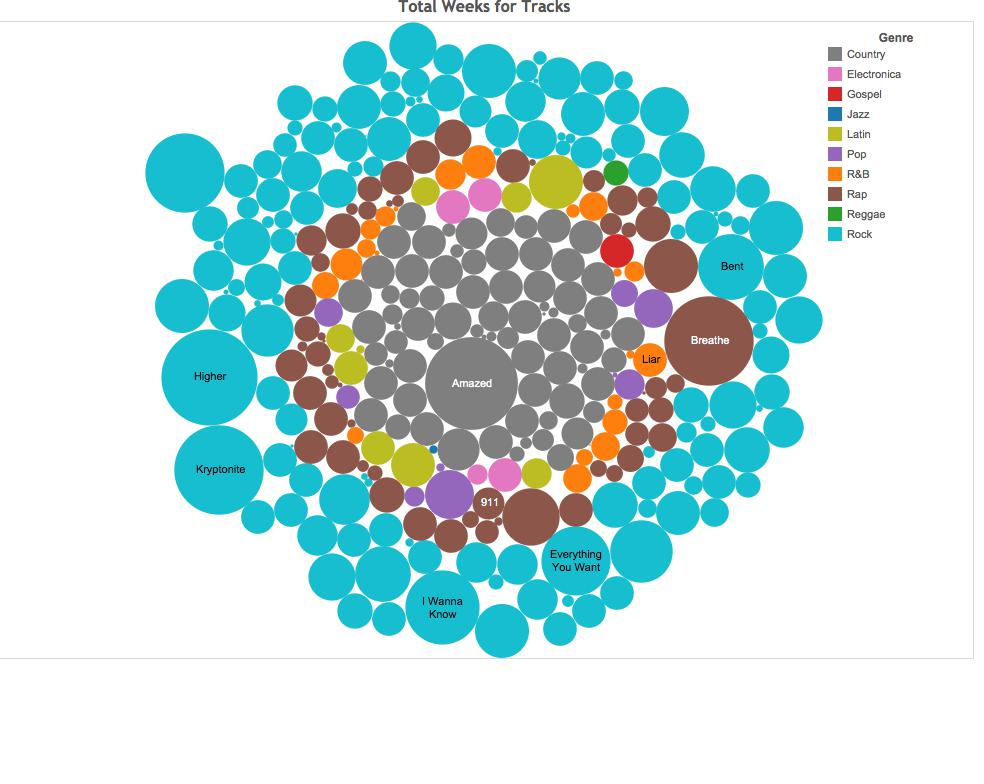

In [220]:
Image(filename='../assets/02-project2-assets/visuals-billboard1/Bubble Map_Total Weeks for Tracks.jpg')

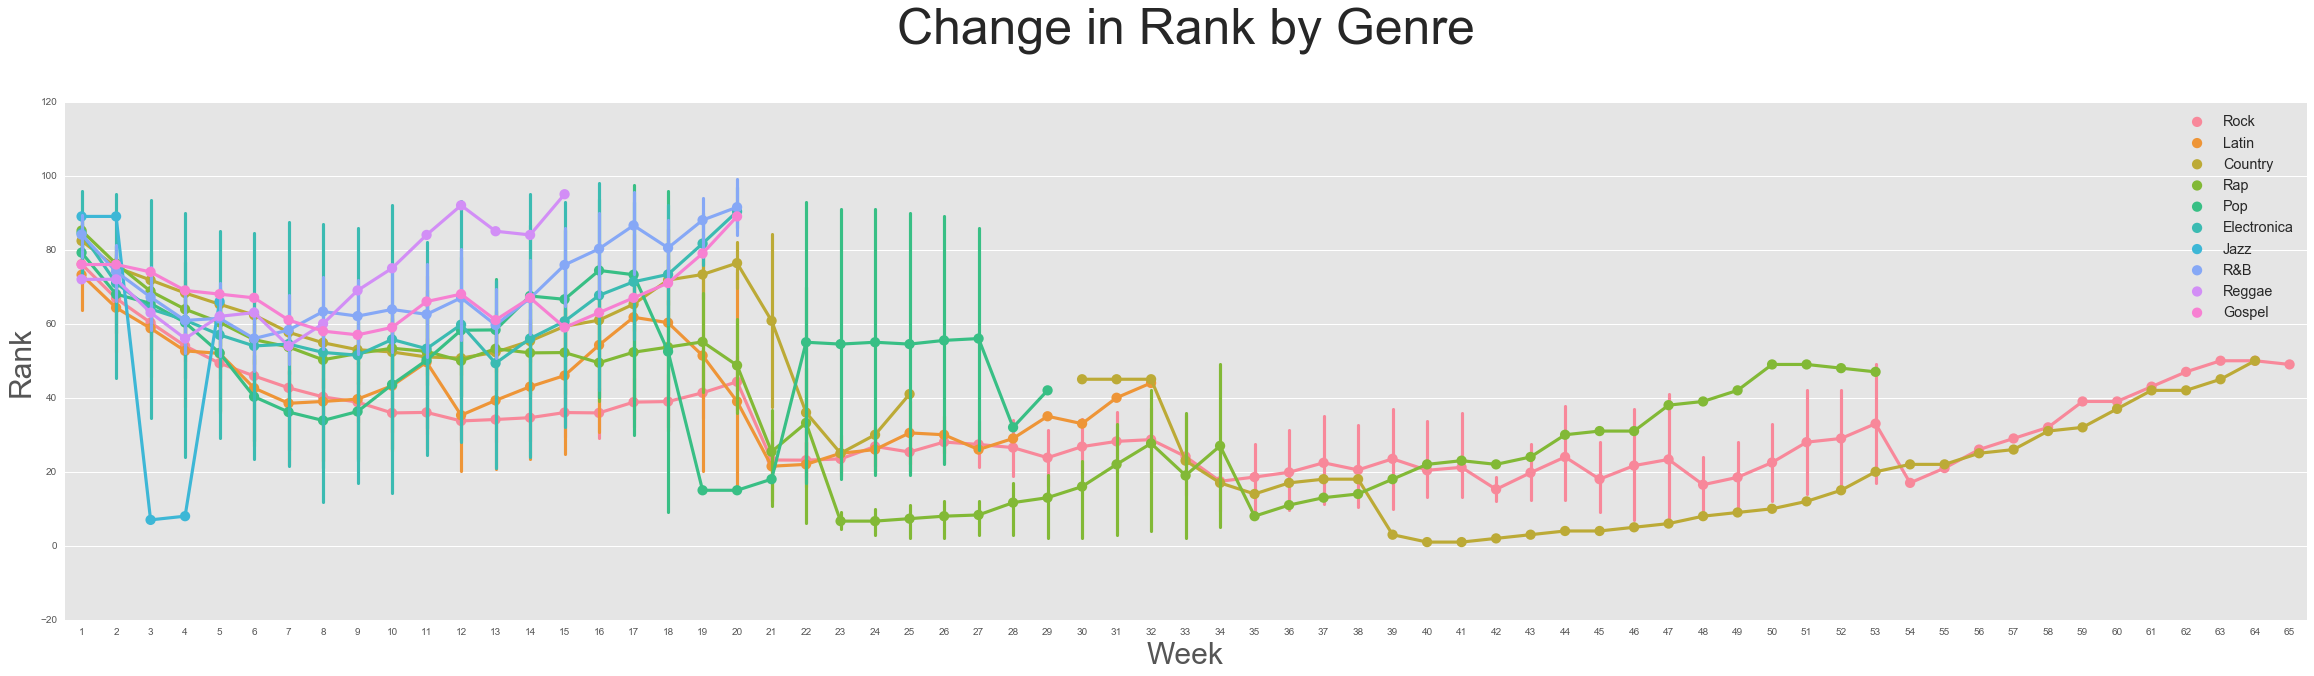

In [221]:
ax = sns.factorplot(x="Week", y="Rank", hue="Genre", data=df1, kind="point", legend_out=False,size=8, aspect=4)
legend = plt.legend(fontsize="x-large")
plt.title('Change in Rank by Genre\n', fontsize = 50)
plt.xlabel("Week", fontsize=30)
plt.ylabel("Rank", fontsize=30)

Above, we have a scatter plot that shows the change in rank for all songs within their genres, spanning the full 64 weeks in which the list of songs had a record within the rankings. Songs are contained within the lines for each genre, which are color coded according to the legend. 

As we can see, rock and country last the longest, but as we can infer from the preceding visual, the tail end of the Country line is a single song: 'Amazed.' To the left of the plot, we see that Latin, Electronica, Jazz, and Reggae songs all have quick exits after making an initial dip into the rankings.

The most thought provoking thing about this plot is illustrated more clearly in the chart below, which is the same, but formulated as an area chart. Clearly, the chart shows us a steep decline in songs present by the 20th week. It looks like songs around 50 or lower (meaning towards 100) by the 19th week were promptly pulled from the rankings entirely, rather than being allowed to gradually fade.

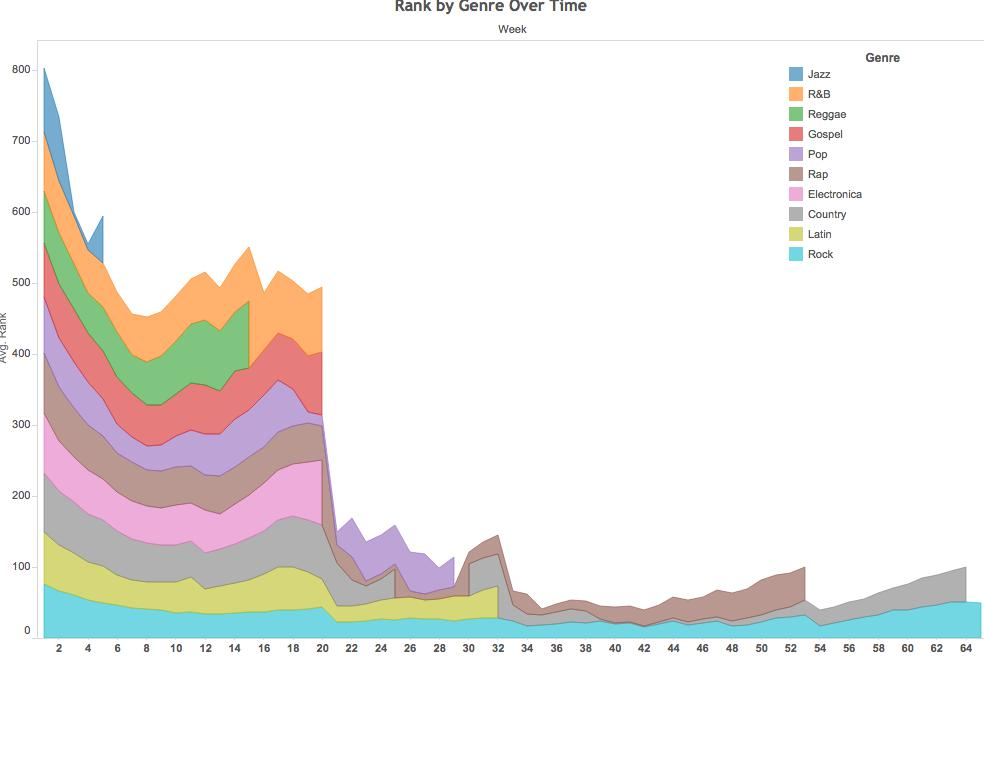

In [222]:
Image(filename='../assets/02-project2-assets/visuals-billboard1/Area Chart_Rank by Genre.jpg')

Here, we see the initial scatterplot above, except each genre is separated into its own plot so we can differentiate trends that may be partial to songs in a particular genre.

Nearly every genre follows a similar pattern, with the bulk of its songs exiting the ranks entirely before the 20th week of records. Songs that were in the Top 50 by that week gradually faded out, as we can see by the tails.

Looking closely at each individual plot confirms that there is something significant about the 20 Week mark and being within the Top 50. Songs that make it to Week 20 within the Top 50 stay on. However, after that 20th week, as soon as they rise above Top 50, they vanish from the rankings entirely, like with Rap, Pop, and Latin. 

This suggests that the music industry, and in this case it must be radio stations, as they control what's played on their stations, must see little use for keeping a song in their rotation if after five months there are 50 songs more popular than it.

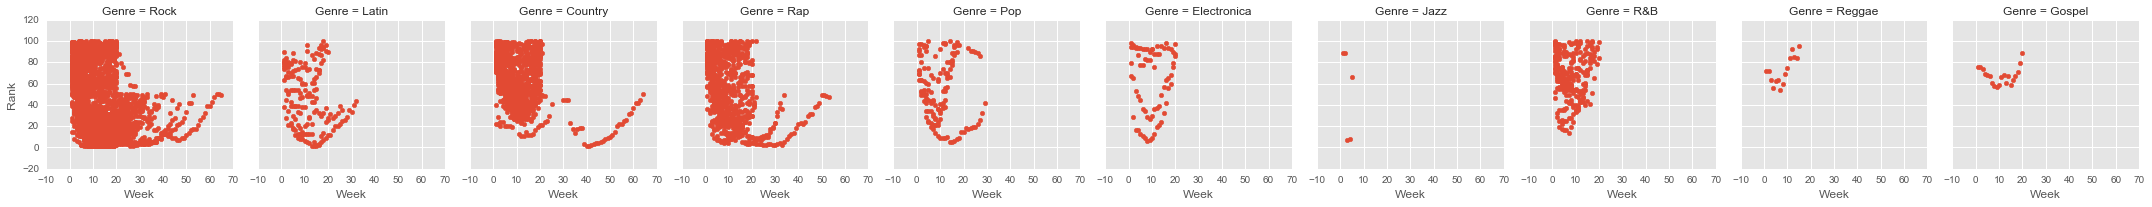

In [223]:
g = sns.FacetGrid(df1, col="Genre")  
g.map(plt.scatter, "Week", "Rank")

Below, we have a bar chart that shows us the average amount of days it took for a song to hit its personal peak, grouped again by genre. The lowest value is, of course, Jazz music, and the longest average was Rock, followed closely by Latin. Generally, most other genres had high averages as well.

While the bar graph may suggest that Latin, Electronica, or Gospel music stayed on the charts for quite a while, let's remember from our first visualization, that there were only 9 Latin songs to begin with, out of a total of 317 songs, and only a handful within Electronica or Gospel.

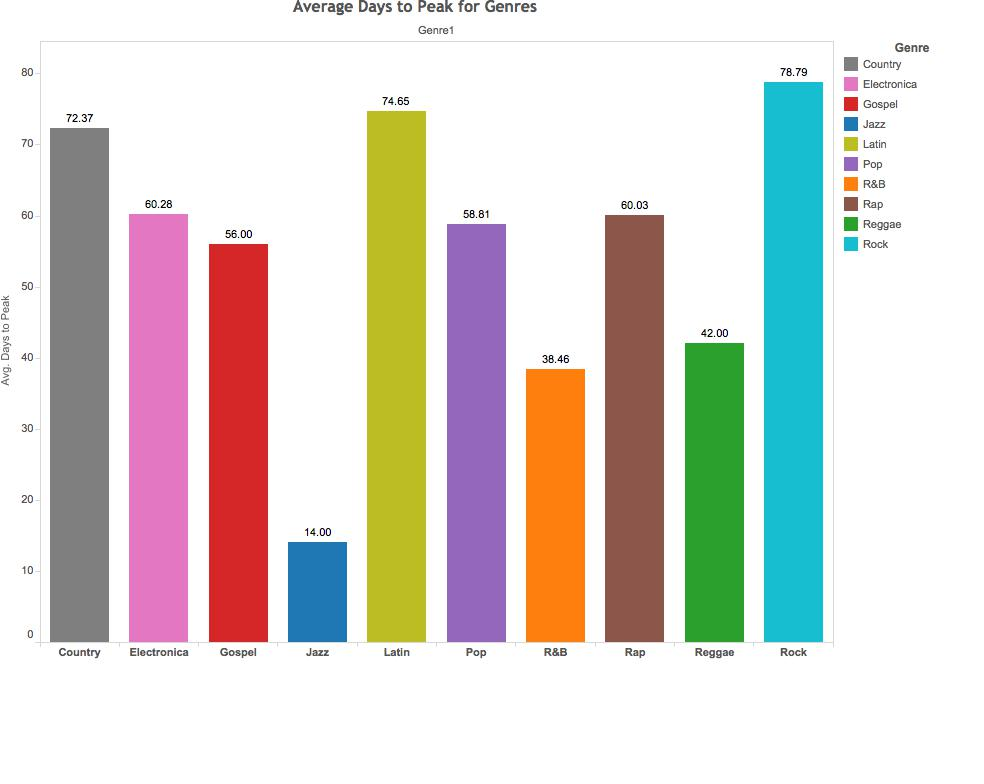

In [224]:
Image(filename='../assets/02-project2-assets/visuals-billboard1/Bar Chart_Days to Peak by Genre.jpg')

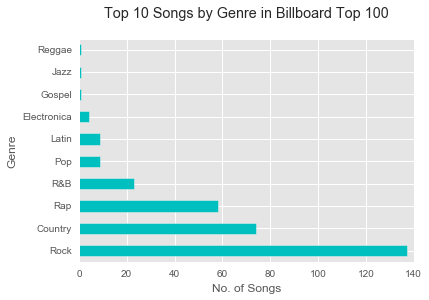

In [225]:
plt.figure(2)
top_genres = bData.genre.value_counts()
top_genres.plot(kind='barh', color = 'c')
plt.ylabel('Genre')
plt.xlabel('No. of Songs')
plt.title('Top 10 Songs by Genre in Billboard Top 100\n')

These bar charts reveal the total share of the Top 100 by genre a bit more clearly than above. As we can see, Rock has nearly twice as many songs as Country, the next most popular genre.

Going slighlty deeper into the rankings, below we have a pie chart that shows the share of the Top 10 songs by genre. Reggae, Jazz, and Gospel never had a song enter the Top 10 at any point in the 73 weeks of collection, so they are no longer present.

Probably the most interesting thing about this is Country. Again, as some of the visuals above illustrate, Country songs clearly have staying power, and there are many that are popular enough to remain in the Top 100 for quite a while. Our bar chart above and our initial visual shows us they're the second most popular overall. That being said, any song that climbs very high in the rankings is an outlier for the genre. Of all songs that at some point were in the Top 10, Rock clearly dominates, and Country only had 1 out of over 70 entries, 'Amazed,' crack that upper echelon.

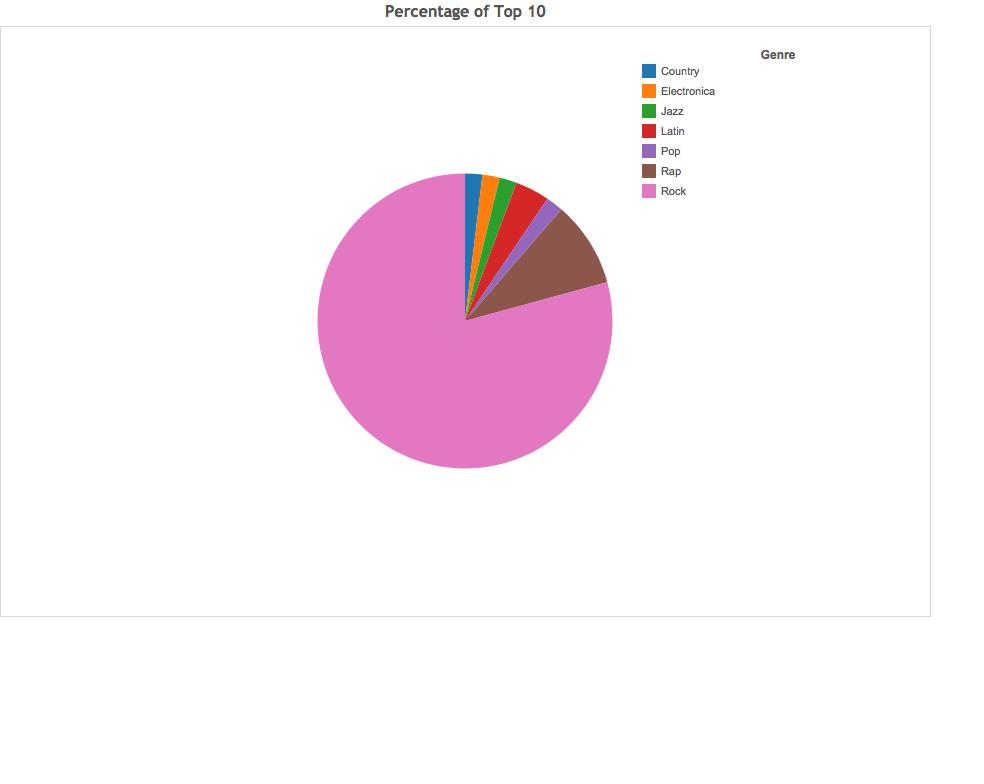

In [226]:
Image(filename='../assets/02-project2-assets/visuals-billboard2/Pie Chart_Top 10.jpg')

Finally, we can see the amount of days it takes a typical song in a genre to reach its peak ranking by the number of weeks it's been in the rankings. Clearly, the longer it's been in the rankings, the longer it takes a song to reach its personal peak. However, it would be interesting to split this line into 2 groups, one in the Top 50 and the other in the bottom 50. We could then see the impact of making the Top 50, where a song may be allowed more time to continue climbing the rankings as opposed to just being forced out.

It would also be helpful to track this alongside earnings from record sales. We could then take a song in the Country genre that remained in the Top 50 for a long time, but never quite got into the Top 10, and compare that to a Pop or Rock song that only had a brief amount of time in the Top 10, and then dropped off quickly. The Country song may have been in the rankings longer, but did it result in more album purchases? The answer to this question could assist record labels in making decisions about how it markets its songs, and for how long, depending on this window of opportunity.

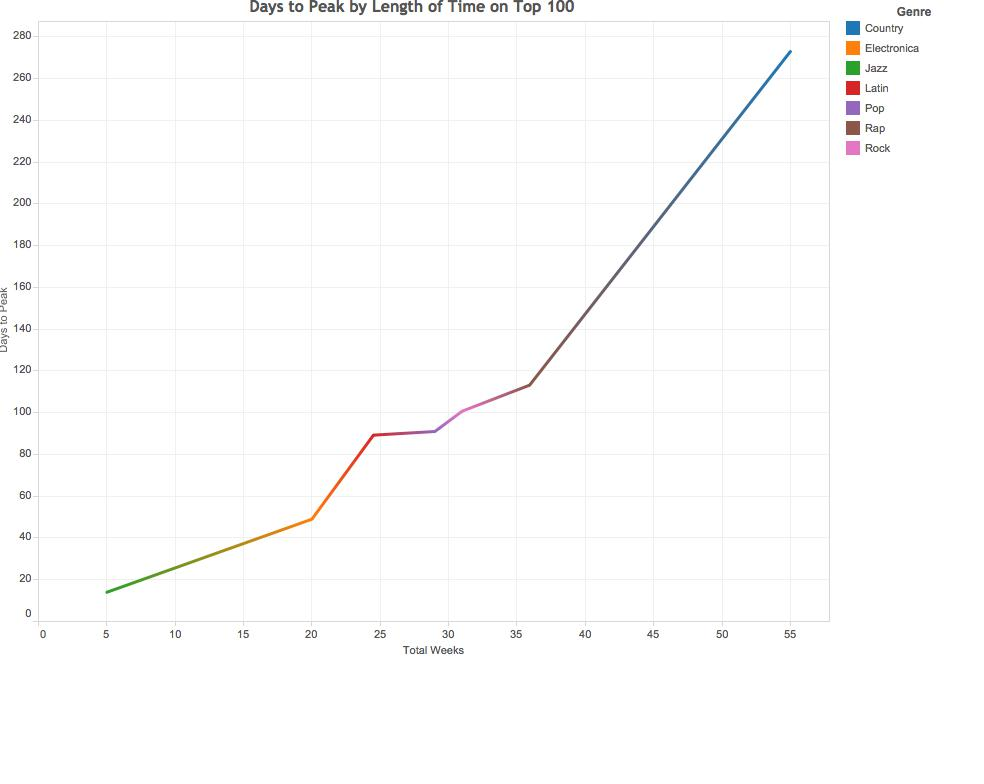

In [227]:
Image(filename='../assets/02-project2-assets/visuals-billboard2/Days to Peak by Weeks.jpg')

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

There is a 20 week threshold for a song of any genre to remain relevant in the Billboard Top 100, otherwise that song will be dropped from the rankings entirely. This gives a particular song a relatively short period of time to gain traction with audiences, and it may force artists and their labels to speed up or slow down production of music in the future if they find their songs don't have much longevity.

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

* First, we need an understanding of industry practices during this period. How exactly are radio stations making their decisions to discontinue playing songs? Do they receive listener input? And if so, in what form? Is it even radio stations that decided to drop a song, or were record labels making those decisions?

* We need to find some industry norming on genre labeling. Looking at this data on the surface, it's cleark that a typical Rock song had a greater chance of making its way ot the top of the rankings at some point. However, artists like Destiny's Child and Creed each have songs categorized as Rock, yet their music isn't similar. Could a record label use Rock's popularity and simply tag it to a song, giving it a greater chance of gaining traction in the rankings?

* Records of earnings from individual songs would be helpful in determining the extent to which these rankings impacted consumer purchases. We could then see if being in the Top 10 for a short period of time was more valuable than being in the middle of the pack for a very long time. This was in a media environment where if a listener wanted to own a particular song, they had to purchase the entire album it came on. If we could attach song rankings to album sales, we could determine if a single hit song was enough of an incentive for a consumer to take a chance on an entire album of songs or not.

* Similar rankings data from the most recent couple of years would be useful for a comparison that could more effectively determine the nature of popularity for individual songs. At the time of our current data set, 1999 - 2000, media consumption was largely industry controlled. A typical listener didn't have access to any songs, and could either choose to listen to a song on a radio station, or change to a different radio station if they didn't care for that song. If we could compare that process to today's environment, where a listener can simply use the internet to listen to whichever song they choose, regardless of what radio stations or record labels place in front of them, we could gain a clearer perspective as to what factors contribute to a song's lasting popularity. Will a song last for dozens of weeks on end in today's environmnet? Or will the limitless choices force artists to constantly produce mroe songs to keep up with demand? Can record labels survive today's environment using a model similar to our current data set?

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 